# Vector Spaces, Distance, and Similarity

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

We consider a number of concepts and corresponding definitions from linear algebra that will allow us to embed data entries in a vector space. This in turn will allow us to use common constructs to compare data entries with one another.

Note that the kinds of data we can embed in a vector space is varied, and can include:
* Records describing (human) users
* Graphs
* Images
* Videos
* Text (e.g., webpages, books, etc.)
* Strings (e.g., DNA sequences)
* Timeseries

Once we convert these to vectors, we can use the same constructs to work with any of these different types of data.

## Feature Spaces

A **data set** is a collection of zero or more **data entries**. If a data set is represented as a table, these would correspond to the **rows** of the table.

Each data entry usually consists of a number of **attributes** (also known as **dimensions** or **features**). If a data set is represented as a table, these would correspond to the **columns**.

For example, the following data set consists of two data entries. Each entry has three attribtues: a name, an age, and an income.

* (`"J. Smith"`, 25, \$200,000)
* (`"M. Jones"`, 47, \$45,000)

If all the features of the data entries within a data set can be represented as real numbers, then we can visualize each data object as a point in a vector space. For example:
 * (25, USD 200,000) $\rightarrow \mat{{c}25\\200000}$.

Alternatively, if all the features are binary then we can think of each data object as a binary vector in a vector space.

The vector space that contains the vectors corresponding to data entries is often called a **feature space.** Attributes could then be called **feature dimensions** of this space.

**Definition:** A (real-valued) **vector** is an ordered, finite tuple of real numbers $(x_1, ..., x_n) \in \R^n$.

Note that we will use individual variables to denote an entire vector (e.g., $x \in \R^n$), and that same variable with a subscript index (e.g., $x_i$) to denote individual components of that vector; thus, we have that $x = (x_1, ..., x_n)$.

## Metrics and Similarity

A **metric** over a vector space $V$ is a function $m:V \times V \to \R$ that maps pairs of vectors to a real number and satisfies the following conditions for all $x,y,z \in V$:
* **Non-negativity:** $m(x, y) \geq 0$ 
* **Identity of indiscernibles:** $m(x, y) = 0$ iff $x = y$
* **Symmetry:** $m(x, y) = m(y, x)$
* **Triangle inequality:** $m(x, z) \leq m(x, y) + m(y, z)$

Metrics can be viewed as providing a notion of distance between vectors in the space.

Metrics provide a natural way to quantify how **similar** or **dissimilar** two objects are. One way to interpret the real value computed by a metric function is as a measure of dissimilarity (i.e., the larger the distance is between two vectors, the more dissimilar are the two data entries corresponding to those two vectors).

Sometimes we will use "distance" informally when referring to a dissimilarity function, even if we are not sure it is a metric according to the definition above. We will try to say "dissimilarity" in those cases, however.

Why is it important or valuable for a dissimilarity to be a metric?

The additional constraints allow us to reason about and more easily visualize the data. The main way this happens is through the triangle inequality. We can interpret it in the following way: if two objects are "similar" to another object, then they are "similar" to each other. 

This does not always apply to all data sets, however. For example, distances in a network or graph may not obey the triangle inequality. For another example, consider fuel consumption on rough terrain: going uphill from opposite points of a hill may consume some amount of fuel, but going uphill and then downhill to the other side would consume less fuel.

Definitions of distance or dissimilarity are usually different for real, boolean, categorical, and ordinal feature dimensions. Furthermore, weights may be associated with different feature dimensions.

## Matrix Representations and Interpretation

When treating data sets as vectors in a vector space, it is often convenient to manage that data in matrix form. The standard way of doing so is illustrated below, wherein feature dimensions correspond to matrix columns and data entries correspond to rows:

$$ \mbox{$m$ data entries}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{in}\\\vdots\\x_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}} $$

As a convention, we will use $m$ to refer to the number of rows (i.e., data entries) and $n$ for the number of columns (i.e., the number of feature dimensions).


Another common scenario involving a matrix representation is one in which we consider the distances between all pairs of data entries. The matrix representation then looks as below:

$$ \mbox{$m$ data entries}\left\{\begin{array}{c}\;\\\;\\\;\\\;\end{array}\right.\;\;
\overbrace{\left[\begin{array}{cccc}
\begin{array}{c}0\\d(1,2)\\d(1,3)\\\vdots\\d(1,m)\end{array} &
\begin{array}{c}\;\\0\\d(2,3)\\\vdots\\d(2,m)\end{array} &
\begin{array}{c}\;\\\;\\\ddots\\\vdots\\\dots\end{array} &
\begin{array}{c}\;\\\;\\\;\\\;\\0\end{array} \\
\end{array}\right]}^{\mbox{$m$ data entries}} $$


## Useful Metrics

There are many functions over vector spaces that satisfy the definition of a metric. One general form is the **Minkowski distance**: for $p \geq 1$, it is defined as:

$$ L_p(x, y) = \left(\sum_{i=1}^d |x_i - y_i|^p\right)^{\frac{1}{p}} $$

A special case of this where $p=2$ yields the familiar **Euclidean** metric:

$$ L_2(x, y) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}$$

In [33]:
def L2(x, y):    
    return (sum((x[i] - y[i])**2 for i in range(min(len(x),len(y)))))**0.5

def L2(x, y):
    return (sum((xi - yi)**2 for (xi,yi) in zip(x,y)))**0.5

print(L2((1,2,3), (4,5,6)))

5.196152422706632


In the $p = 1$ case we get the **Manhattan** or **taxicab** metric:

$$L_1(x, y) = \sum_{i=1} |x_i - y_i|$$

When working with boolean or binary discrete vector spaces, this also corresponds to the **Hamming** distance.

If we take the limit as $p$ gets large we get the metric based on the $\ell_\infty$ norm, which yields the __largest element__ in the difference between two vectors (i.e., the dimension along which the difference between two vectors will yield the longest projection).

Another related idea is the case where $p = 0$. In this case, the function counts the number of __nonzero__ elements in the difference vector between two vectors, which also corresponds to the number of feature dimensions along which two vectors differ. This is known as the difference vector's __sparsity.__

## Similarity and Dissimilarity

**Definition:** Given two vectors $x, y \in \R^n$, the dot product of these two vectors is defined as:

$$x \cdot y \ = \ \sum_{i=1}^{n} x_i \cdot y_i \ = \ x_1 \cdot x_2 + ... + x_n \cdot y_n$$

The dot product of two vectors can be used to compute the __cosine of the angle__ between the two vectors:

$$\cos(x, y) = \frac{x \cdot y}{\Vert x \Vert \cdot \Vert y \Vert} = \frac{x}{\Vert x \Vert} \cdot \frac{y}{\Vert y \Vert}$$

Note that this value is **large** when $x \approx y$. Thus, it is a __similarity__ function.

We often find that we have a similarity function $s$, but need to convert it to a dissimilarity function $d$. Two straightforward ways of doing so are (for some properly chosen $k$):
* $d(x,y) = \frac{1}{s(x,y)}$
* $d(x,y) = k - s(x,y)$

For cosine similarity, we often use:

$$d(x, y) = 1 - \cos(x, y)$$

Note that this is **not a metric**! However, if we recover the actual angle beween $x$ and $y$, that is a metric.

## Bit Vectors and Sets

When working with bit vectors, the $p=1$ case is commonly used and called the **Hamming** distance. This has a natural interpretation: it quantifies how well two bit vectors match. It can also be viewed as the **edit distance**: what is the smallest number of bit flips that will convert one vector into the other?

In other cases, the Hamming distance is not a very appropriate metric. Consider the case in which the bit vector is being used to represent a set. In that case, Hamming distance measures the **size of the set difference**.

For example, consider two documents.   We will use bit vectors to represent the sets of words in each document. Consider the following two cases:
* **Case 1**: both documents are large and almost identical, but differ in 10 words
* **Case 2**: both documents are small and disjoint, having 5 words each that do not occur in the other document

Case 1 would yield a larger Hamming distance than Case 2.

What matters is not just the size of the set difference, but the size of the intersection as well. This leads to the **Jaccard** similarity function for two sets $A$ and $B$:

$$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

This yields values in the range between 0 and 1, so a natural dissimilarity metric that can be derived from this is $1 - J(A, B)$.

$$J_d(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}$$

In [4]:
# Two example documents.
d = "Azertyuiop won a hurdle at Auteuil, Paris in October."
e = "October in Paris is marked with cool weather."

# Normalize the content.
d = d.lower().replace(",","").replace(".","").split(" ")
e = e.lower().replace(",","").replace(".","").split(" ")

X = set(d)
Y = set(e)

print(X)
print(Y)

{'azertyuiop', 'at', 'in', 'hurdle', 'won', 'auteuil', 'paris', 'october', 'a'}
{'in', 'with', 'marked', 'paris', 'cool', 'october', 'weather', 'is'}


In [5]:
def J(A, B):
    return len(A & B) / len(A | B)

print(J(X, Y))
print(J(X, X))

0.21428571428571427
1.0


In [7]:
words = sorted(list(X | Y))
print(words)

x = tuple(1 if word in X else 0 for word in words)
y = tuple(1 if word in Y else 0 for word in words)

print(x)
print(y)

def L1(x, y):
    return sum(abs(x[i] - y[i]) for i in range(0,min(len(x), len(y))))

def L1(x, y):
    return sum(abs(xi-yi) for (xi,yi) in zip(x,y))

print(L1(x,y))
print(1 - (L1(x,y) / len(x)))

['a', 'at', 'auteuil', 'azertyuiop', 'cool', 'hurdle', 'in', 'is', 'marked', 'october', 'paris', 'weather', 'with', 'won']
(1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1)
(0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0)
11
0.2142857142857143


## Example: Time Series

A time series is an ordered sequence of real numbers, representing the measurements of a real variable at equal time intervals. Examples of real-world phenomena that can be represented in this way include:
* stock prices
* volume of sales over time
* daily temperature readings

A time series database is a large collection of such time series.

### Similarity of Time Series

How can we measure the "similarity" of two time series? We will assume they are the same length. Examples of problems that can be viewed this way include:
* finding companies with similar stock price movements over a time interval
* finding users with similar credit usage patterns

Other types of data are amenable to similar sorts of analyses:
* find similar DNA sequences (where "time" corresponds to their arrangement in the genome)

We face two problems:
1. defining a meaningful similarity (or distance) function
2. finding an efficient algorithm to compute it

### Issues with Similarity Measures from Metrics

We could just view each sequence as a vector and use a metric to measure the similarity. The advantages are:
1. it is easy to compute - linear in the length of the time series (i.e., $O(n)$)
2. it is a metric and thus possesses all the associated properties

There is, however, a disadvantage: what is the meaning of the metric?

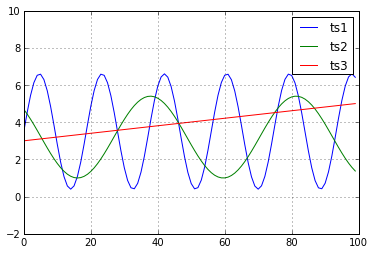

In [22]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-ts-euclidean.png", width=550))

In the above, it is intuitive that that `ts1` and `ts2` are "more similar". However, according to Euclidean distance: d(ts1, ts2) = 26.9, while d(ts1, ts3) = 23.2.

### Feature Engineering

In general, there may be different aspects of a time series that are important in different settings. One approach is to decide what is important about time series in the particular application domain in question.

This is an example of **feature engineering**: the process of identifying, defining, and computing some **derived** attributes from your data entries that make its important properties usable in a subsequent step. 

Thus, a typical approach that employs this technique may involve:
* identifying relevant features (perhaps algorithmically using other techniques)
* extracting the relevant features (in some automated way)
* using an existing method (e.g., metrics) to define similarity over the new, derived features

In the time series application above, there may be a number of potential techniques that could be used for the feature engineering step, including:
* Fourier coefficients (to capture periodicity)
* Histograms

### Dynamic Time Warping

Feature engineering can become fairly sophisticated, and could even require the use of metrics. One example is "bump hunting" within time series data.

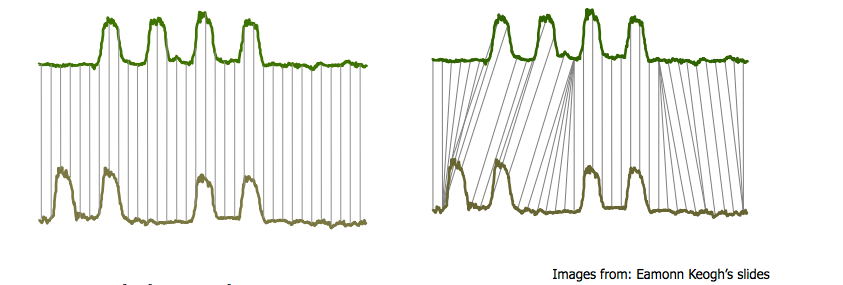

In [13]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-DTW-1.png", width=550))

Note that both of the above time series have the same characteristics: four bumps. However, matching the entries of the vectors according to their position will not capture this, and metric-based notions of similarity will indicate that the sequences are very different.

One solution to this is called **dynamic time warping**, or **sequence alignment**. The idea is to allow acceleration or deceleration of signals along the time dimension. Classic applications of this approach include:
* speech recognition
* signature (i.e., pattern) recognition

Consider two sequences $X = x_1, x_2, \dots, x_n$ and $Y = y_1, y_2, \dots, y_n$. We are allowed to extend each sequence by repeating any elements that we choose to form two new sequences $X'$ and $Y'$.

There is a way to visualize this algorithm. Consider a matrix $M$ where $M_{ij} = |x_i - y_j|$ (or some other error measure).

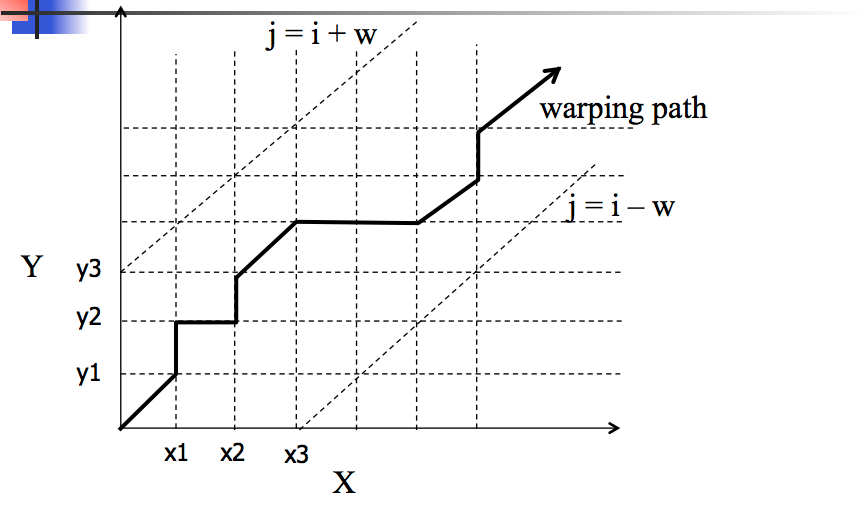

In [24]:
sl.hide_code_in_slideshow()
display(Image("figs/L5-DTW-2.png", width=550))

$M$ represents the amount of error we have if we match $x_i$ with $y_j$. So we seek a **path through $M$ that minimizes the total error**. In the diagram above, we start in the lower left and work our way up via a continuous path. There are some restrictions (we choose these to simplify the algorithm and make the problem more tractable): 
* **monotonicity**: path should not go down or to the left
* **continuity**: no elements may be skipped in sequence

This can be solved via dynamic programming.  However, the algorithm is still quadratic in $n$. Hence, we may choose to put a restriction on the amount that the path can deviate from the diagonal. The basic algorithm could have the structure below:

`D[0, 0] = 0
for i in range(n):
    for j in range (m):
        D[i,j] = M[i,j] + min( D[i-1, j],  # insertion
                               D[i, j-1],  # deletion
                               D[i-1, j-1]) # match`

Unfortunately, the algorithm is still *quadratic* in $n$. More precisely, it runs in time $O(nm)$ on sequences of length $n$ and $m$. Hence, we may choose to put a restriction on the amount that the path can deviate from the diagonal. This is implemented by not allowing the path to pass through locations where $|i - j| > w$. Then the algorithm has complexity $O(nw)$.

### Related Notions

A closely related idea concerns strings. Strings are just sequences, like time series.

Given two strings, one way to define a 'distance' between them as the minimum number of edit operations that are needed to transform one string into the other. The edit operations are insertion, deletion, and substitution of single characters. This is called __edit distance__ or __Levenshtein distance.__

A very similar dynamic programming algorithm can be used to find this distance. In bioinformatics this algorithm is called "Smith-Waterman" sequence alignment. At this point, there are much more sophisticated similarity measures.

### How are (dis)similarity measures used?

Similarity measures are most useful when you have a large collection of objects. Computing their pairwise similarities (or distances) is often used the first step in a more complex analysis. Subsequent steps might involve:
* clustering
* a database allowing to search for similar objects
* fitting a model for how the objects were generated